# **3. Machine Learning for Classification**

# **3.1 Data preparation**

In [686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [694]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [695]:
!wget $data -O data-week-3.csv 

--2024-10-14 09:50:35--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.1s    

2024-10-14 09:50:35 (6.98 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [701]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [702]:
len(df)

7043

In [703]:
df.shape

(7043, 21)

In [704]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [705]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [706]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [707]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [708]:
# totalcharges should be numbers and not object, there are numbers but the type is object which means some of the values are not numbers
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [709]:
pd.to_numeric(df.totalcharges, errors= 'coerce') # ignore the not numeric values

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [710]:
df[tc.isnull()][['customerid', 'totalcharges']] 
# totalcharges here are missing

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [711]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df['totalcharges'] = df['totalcharges'].fillna(0) # fill them with zeros

In [712]:
df[tc.isnull()][['customerid', 'totalcharges']] 

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [713]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [714]:
# yes is 1 and no is 0 because we need int data 
df.churn = (df.churn == 'yes').astype(int)

# **3.2 Setting up validation framework**

### Performing train/test/validation split wiht Scikit-Learn 


In [715]:
from sklearn.model_selection import train_test_split

In [716]:
# Splitting the dataset into training, validation, and test sets.
# First, we split the original DataFrame 'df' into 'df_train_full' (80% of the data) and 'df_test' (20% of the data) using train_test_split.
# The 'random_state' ensures reproducibility.
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [717]:
# Next, we split 'df_train_full' into 'df_train' (75% of the remaining data)
# and 'df_val' (25% of the remaining data) using train_test_split.
# This results in 'df_train' being 60% of the original data and 'df_val' being 20%.
# Again, the 'random_state' ensures reproducibility.
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

In [718]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [719]:
df_train = df_train.reset_index(drop =True)
df_val = df_val.reset_index(drop =True)
df_test = df_test.reset_index(drop =True)

In [720]:
df_train.shape

(4225, 21)

In [721]:
df_val.shape

(1409, 21)

In [722]:
# Extracting the target variable 'churn' from each of the datasets.
# '.values' is used to convert the 'churn' column into a NumPy array, 
# which is often required for training machine learning models.
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [723]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1448-cywkc,female,0,yes,yes,58,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),105.20,6225.40,0
1,6127-isgtu,female,0,yes,no,16,yes,yes,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,84.95,1378.25,1
2,3279-dyzqm,male,0,yes,yes,71,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.45,1378.45,0
3,8485-gjcdn,female,1,no,no,5,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,69.05,318.50,1
4,2195-zrvax,female,0,yes,no,47,yes,no,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,85.30,4045.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,4778-izarl,male,0,yes,no,63,yes,no,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,credit_card_(automatic),110.10,6705.70,0
4221,4342-hentk,female,1,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.65,142.35,1
4222,6598-rffvi,male,0,no,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,credit_card_(automatic),19.30,28.30,1
4223,8204-tifgj,female,0,no,no,23,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,bank_transfer_(automatic),20.30,470.60,0


##### After extracting the 'churn' column as the target variable (y_train, y_val, y_test),
##### we remove the 'churn' column from the training, validation, and test DataFrames.
##### This is to ensure that the target variable is not included as a feature
##### when training the model, as it would lead to data leakage.

In [724]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# **3.3 EDA**

In [726]:
df_train_full

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
5946,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
3881,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
2389,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
3676,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5192,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
3980,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
235,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [727]:
df_train_full.isnull().sum() # there is no missing values in the dataset

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [728]:
df_train_full.churn # target variable 

1814    0
5946    1
3881    0
2389    0
3676    0
       ..
905     1
5192    0
3980    1
235     1
5157    0
Name: churn, Length: 5634, dtype: int64

In [729]:
df_train_full.churn.value_counts(normalize =True) #normalize is looking for the percentage


churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

### churn rate is 0.269968 which is ≈ 27%.

In [730]:
global_churn_rate = df_train_full.churn.mean()
round (global_chrun_rate, 2)

0.27

In [731]:
df_train_full.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [734]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

In [735]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# **3.4 Feature importanec: Churn rate and risk ratio**

## **Chaurn rate**

In [736]:
# Calculating the average churn rate for female customers.
# This shows the proportion of female customers who churned.
churn_female = df_train_full[df_train_full.gender == 'female'].churn.mean()
churn_female 

0.27682403433476394

In [739]:
# Calculating the average churn rate for male customers.
# This shows the proportion of male customers who churned.
churn_male = df_train_full[df_train_full.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [740]:
df_train_full.partner.value_counts()
# There are 2,932 customers without a partner and 2,702 customers with a partner.

partner
no     2932
yes    2702
Name: count, dtype: int64

In [741]:
# Calculating the average churn rate for customers who have a partner.
# This shows the proportion of partnered customers who churned.
churn_partner = df_train_full[df_train_full.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [743]:
# Calculating the average churn rate for customers who do not have a partner.
# This shows the proportion of non-partnered customers who churned.
churn_no_partner = df_train_full[df_train_full.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

### **Analysis:**
#### **Gender-Based Churn Rates:**

Female customers have a churn rate of approximately 27.68%.
Male customers have a slightly lower churn rate of about 26.32%.
This suggests that, on average, female customers are slightly more likely to churn than male customers.

#### **Partnership Status and Churn Rates:**

Customers with a partner have a churn rate of approximately 20.50%, which is significantly lower than those without a partner.
Customers without a partner have a churn rate of about 32.98%.
This indicates that customers without a partner are more likely to churn than those with a partner, suggesting that having a partner might be associated with greater customer retention.

In [744]:
global_churn_rate - churn_partner

0.06493474245795922

In [745]:
global_churn_rate - churn_no_partner

-0.05984095297455855

In [746]:
global_churn_rate - churn_male

0.006754520462819769

In [747]:
global_churn_rate - churn_female

-0.006855983216553063



### Insights:

1. **Partnered Customers**:
   - **Churn Rate Difference**: Global churn rate - churn_partner = **0.0649** (lower)
   - **Interpretation**: Partnered customers have a significantly lower churn rate (about 6.49% less than average), indicating that partnerships enhance customer retention.

2. **Female Customers**:
   - **Churn Rate Difference**: Global churn rate - churn_female = **-0.0069** (slightly lower)
   - **Interpretation**: Female customers churn at a rate similar to the global average, suggesting moderate stability.

3. **Male Customers**:
   - **Churn Rate Difference**: Global churn rate - churn_male = **0.0068** (slightly higher)
   - **Interpretation**: Male customers are slightly more likely to churn (about 0.68% more than average), indicating a potential area for improvement.

4. **Non-Partnered Customers**:
   - **Churn Rate Difference**: Global churn rate - churn_no_partner = **-0.0598** (higher)
   - **Interpretation**: Non-partnered customers have a higher churn rate (about 5.98% more than average), highlighting the need for targeted retention strategies.

### Conclusion:
Having a partner significantly boosts retention, while non-partnered and male customers show higher churn rates. Focus on enhancing the experience for these groups to improve overall customer loyalty.

In [748]:
# Store churn rates in a dictionary for organized access
churn_rates = {
    'Partnered Customers': churn_partner,
    'Non-Partnered Customers': churn_no_partner,
    'Female Customers': churn_female,
    'Male Customers': churn_male,
}

In [749]:
# Print churn rates and differences
print("Churn Rate Analysis:")
for segment, churn_rate in churn_rates.items():
    difference = global_churn_rate - churn_rate
    print(f"{segment}: Churn Rate = {churn_rate:.4f}, Difference from Global = {difference:.4f}")
# insights based on the churn rates
if churn_partner < global_churn_rate:
    print("- Partnered customers have lower churn rates, indicating better retention.")
if churn_no_partner > global_churn_rate:
    print("- Non-partnered customers have significantly higher churn rates, requiring targeted retention strategies.")
if churn_male > global_churn_rate:
    print("- Male customers show higher churn rates, suggesting a need for improved engagement.")


Churn Rate Analysis:
Partnered Customers: Churn Rate = 0.2050, Difference from Global = 0.0649
Non-Partnered Customers: Churn Rate = 0.3298, Difference from Global = -0.0598
Female Customers: Churn Rate = 0.2768, Difference from Global = -0.0069
Male Customers: Churn Rate = 0.2632, Difference from Global = 0.0068
- Partnered customers have lower churn rates, indicating better retention.
- Non-partnered customers have significantly higher churn rates, requiring targeted retention strategies.


## **Risk ratio**

In [750]:
churn_partner/global_churn_rate

0.7594724924338315

In [751]:
churn_no_partner/global_churn_rate

1.2216593879412643

In [752]:
churn_male/global_churn_rate

0.9749802969838747

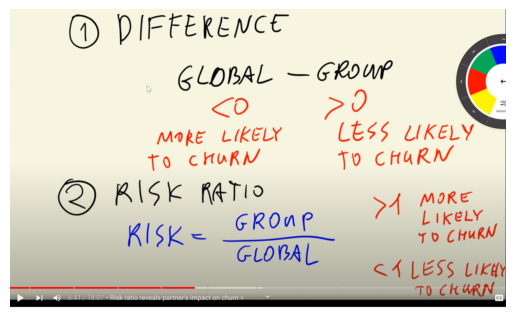

In [753]:
img = mpimg.imread('/Users/elhamkhorasani/Desktop/Picture1.png')
plt.imshow(img)
plt.axis('off')  # Hide axes if needed
plt.show()

In [784]:
from IPython.display import display
for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


# **3.5 Feature importanec: Mutual Information**

# Mutual Information

Mutual Information (MI) is a statistical measure used to quantify the amount of information obtained about one random variable through another random variable. It is a concept from information theory that helps to understand the relationship between two variables, whether they are continuous or categorical.



In [754]:
from sklearn.metrics import mutual_info_score

In [755]:
mutual_info_score(df_train_full.churn, df_train_full.partner)

0.009967689095399745

In [756]:
mutual_info_score(df_train_full.churn, df_train_full.contract)

0.0983203874041556

#### **partner**
Thelow mutual information value (approx. 0.00997) indicates that the partner status of a customer 
contributes very little to predicting their likelihood of churn.
While there might be some dependency, it's not a strong indicator by itself.

#### **contract**
The mutual information value (approx. 0.0983) suggests a moderate relationship between the type of contract
a customer has and their likelihood of churn. This means that knowing a customer's contract type can provide
some information about whether they might churn, making it a potentially valuable feature for prediction models.

In [757]:
# Define a function to calculate mutual information score with 'churn'
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_train_full.churn)


In [758]:
mi = df_train_full[categorical].apply(mutual_info_churn_score)

In [759]:
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

The mutual information scores show that ***contract***, ***onlinesecurity***, and ***techsupport*** are the most relevant features for predicting ***CHURN***, while ***gender***, ***phoneservice***, and ***multiplelines*** provide little insight. This helps prioritize important features for model improvement.

# **3.6 Feature importanec: Correlation**

In [760]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

The correlation values between the numerical features and the churn variable provide insights into the relationship between each feature and customer churn:

**Tenure (-0.351885):** This negative correlation indicates that as the length of time a customer has been with the company increases, the likelihood of churn decreases. Longer-tenured customers tend to be more loyal.

**Monthly Charges (0.196805):** The positive correlation suggests that higher monthly charges are associated with a higher likelihood of churn. Customers paying more per month might be more likely to leave.

**Total Charges (-0.196353):** This negative correlation suggests that customers who have paid more in total (often those who have been with the company longer) are less likely to churn, similar to the trend with tenure.

<span style="color:blue"> **tenure has the strongest relationship with churn, followed by monthly charges and total charges.**</span>

In [761]:
df_train_full[numerical].corrwith(df_train_full.churn).abs()


tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [762]:
df_train_full.groupby(by='churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


In [763]:
df_train_full[df_train_full.tenure <= 2].churn.mean()

0.5953420669577875

In [764]:
df_train_full[(df_train_full.tenure > 2) & (df_train_full.tenure <= 12)].churn.mean()

0.3994413407821229

In [765]:
df_train_full[df_train_full.tenure >12].churn.mean()

0.17634908339788277

# **3.7 One-hot encoding**

In [766]:
from sklearn.feature_extraction import DictVectorizer

In [767]:
df_train_full[['gender', 'contract']].iloc[:10]

,gender,contract
1814,male,two_year
5946,female,one_year
3881,male,two_year
2389,male,one_year
3676,male,one_year
611,female,month-to-month
588,male,two_year
2687,male,month-to-month
1550,male,month-to-month
2890,female,month-to-month


In [768]:
df_train_full.shape

(5634, 21)

In [769]:
# converts the selected DataFrame into a list of dictionaries where each row is represented as a dictionary.
dicts = df_train_full[['gender', 'contract']].iloc[:100].to_dict(orient= 'records') 

In [770]:
len(dicts)

100

In [771]:
# DictVectorizer is a tool that converts lists of feature dictionaries into a numeric matrix.
# It is useful for converting categorical variables into a one-hot encoded format.
dv = DictVectorizer(sparse=False)

In [772]:
dicts[0]

{'gender': 'male', 'contract': 'two_year'}

In [773]:
# This step analyzes the structure of the data (the keys in the dictionaries) and prepares the vectorizer for transformation.
# It learns all possible feature names and values from the dictionaries provided.
dv.fit(dicts) 

DictVectorizer(sparse=False)

In [774]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

This transforms the list of dictionaries into a sparse matrix (or dense if specified).
Each categorical value is converted into a one-hot encoded vector.
Example: The gender feature will be converted into two columns (one for female and one for male), and the contract feature into columns for each possible contract type.

In [775]:
dv.transform(dicts) 

array([[0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0.

### for train dataset

In [776]:
df_train.shape

(4225, 20)

In [777]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [778]:
len(train_dict)

4225

In [779]:
train_dict[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'one_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 58,
 'monthlycharges': 105.2,
 'totalcharges': 6225.4}

In [780]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [781]:
x_train = dv.transform(train_dict)

In [782]:
x_train.shape

(4225, 45)

### for validation dataset

In [783]:
df_val.shape

(1409, 20)

# **3.8 Logistic Regression**

In [788]:
def sigmoid(z):
     return 1/ (1+np.exp(-z))

In [791]:
z = np.linspace(-5, 5, 51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [793]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])